# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('previsao_de_renda.csv')


In [2]:
df.corr()

,Unnamed: 0,index,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
Unnamed: 0,1.000000,-0.001868,0.002567,0.004003,0.015612,-0.004328,-0.002146,0.016628,0.019061,0.007646
index,-0.001868,1.000000,-0.007542,-0.099683,0.039734,-0.047971,-0.034574,0.041818,0.130691,-0.001740
posse_de_veiculo,0.002567,-0.007542,1.000000,-0.014727,0.107959,-0.157837,-0.087514,0.156009,-0.017617,0.063414
posse_de_imovel,0.004003,-0.099683,-0.014727,1.000000,-0.002525,0.122667,0.000112,-0.007180,-0.022499,0.029827
qtd_filhos,0.015612,0.039734,0.107959,-0.002525,1.000000,-0.364303,-0.074250,0.896488,0.009544,0.009567
idade,-0.004328,-0.047971,-0.157837,0.122667,-0.364303,1.000000,0.323934,-0.338805,-0.011087,0.042570
tempo_emprego,-0.002146,-0.034574,-0.087514,0.000112,-0.074250,0.323934,1.000000,-0.065748,-0.047722,0.394235
qt_pessoas_residencia,0.016628,0.041818,0.156009,-0.007180,0.896488,-0.338805,-0.065748,1.000000,-0.001555,0.020977
mau,0.019061,0.130691,-0.017617,-0.022499,0.009544,-0.011087,-0.047722,-0.001555,1.000000,-0.011577
renda,0.007646,-0.001740,0.063414,0.029827,0.009567,0.042570,0.394235,0.020977,-0.011577,1.000000


In [3]:
df.drop(['Unnamed: 0', 'index', 'mau'],axis=1, inplace=True)
df['tempo_emprego'].fillna(value=0, inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   data_ref               15000 non-null  object 
 1   sexo                   15000 non-null  object 
 2   posse_de_veiculo       15000 non-null  bool   
 3   posse_de_imovel        15000 non-null  bool   
 4   qtd_filhos             15000 non-null  int64  
 5   tipo_renda             15000 non-null  object 
 6   educacao               15000 non-null  object 
 7   estado_civil           15000 non-null  object 
 8   tipo_residencia        15000 non-null  object 
 9   idade                  15000 non-null  int64  
 10  tempo_emprego          15000 non-null  float64
 11  qt_pessoas_residencia  15000 non-null  float64
 12  renda                  15000 non-null  float64
dtypes: bool(2), float64(3), int64(2), object(6)
memory usage: 1.3+ MB


In [32]:
sns.pairplot(df[['qtd_filhos', 'tipo_renda', 'idade', 'tempo_emprego', 'qt_pessoas_residencia', 'renda']], hue='tipo_renda')

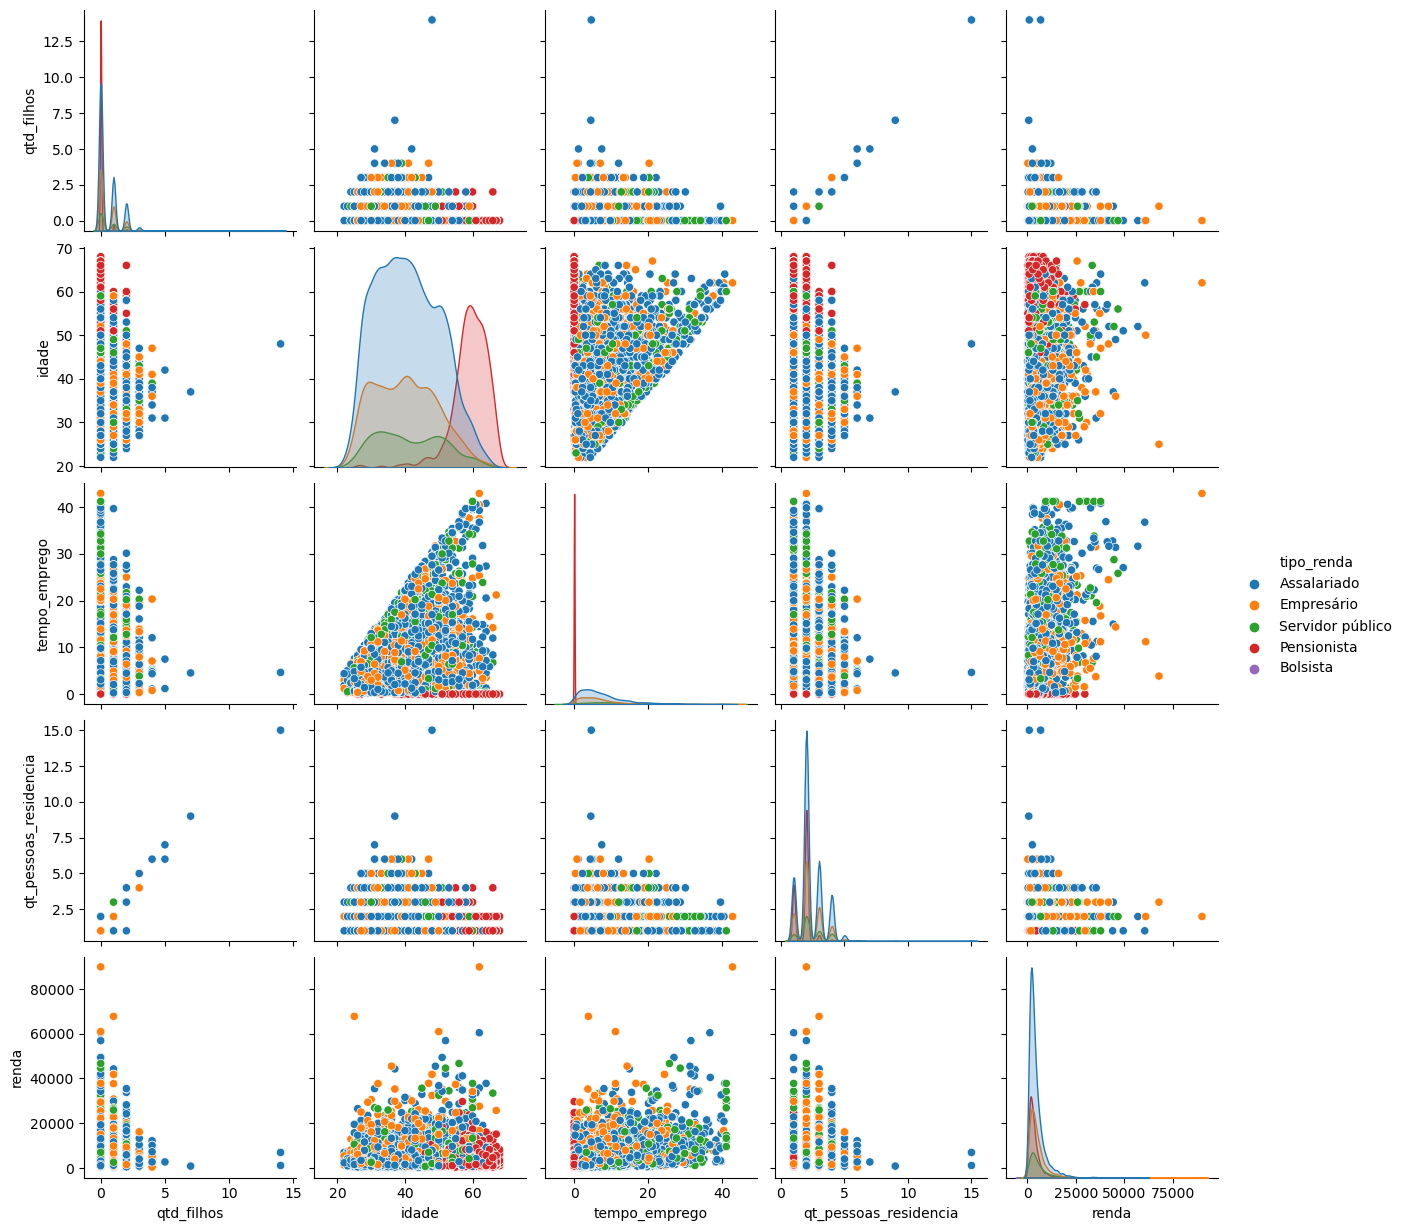

In [33]:
plt.show()

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

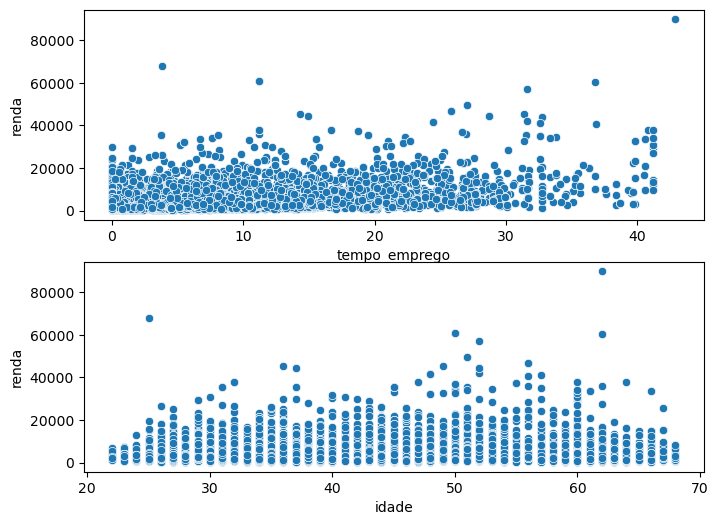

In [46]:
plt.rc('figure', figsize=(8, 6))
fig, axes = plt.subplots(2, 1)
sns.scatterplot(data=df, x='idade', y='renda', ax=axes[1])
sns.scatterplot(data=df, x='tempo_emprego', y='renda', ax=axes[0])
plt.show()

3) Na su aopinião, há outliers na variável renda?

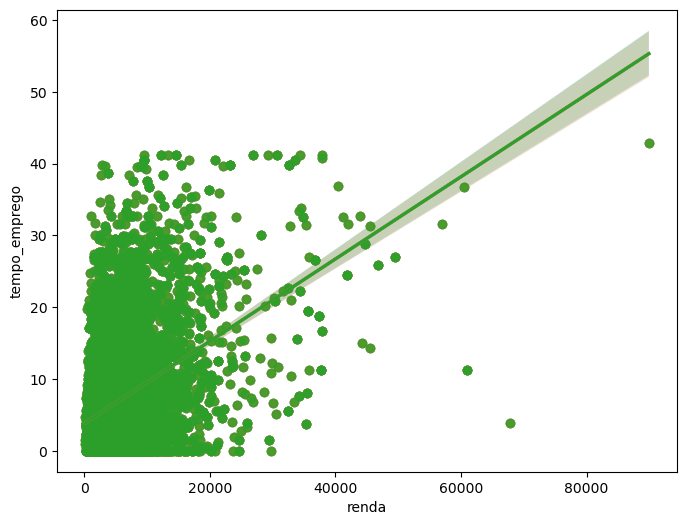

In [55]:
sns.regplot(x='renda', y='tempo_emprego', data = df)
plt.show()

4) Calcule o logaritmo da variável renda e repita a sequência de análise

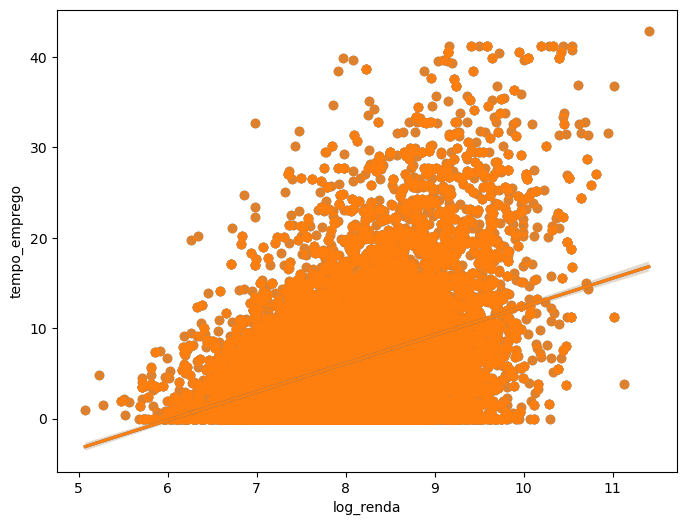

In [58]:
df['log_renda'] = np.log(df['renda'])
sns.regplot(x='log_renda', y='tempo_emprego', data = df)
plt.show()

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

aparentemente não fez diferença, a variável renda apresenta baixa correlação com as demais variáveis do dataframe.
Base de dados bem diferente do conteúdo apresentado em aula.